In [21]:
import numpy as np
from matplotlib.pyplot import *

In [22]:
# pendulum dynamics
def f(x, parameters):
  m, L, g, d = parameters
  theta, dtheta = x
  ddtheta = (-g/L) * np.sin(theta) #- d*dtheta 
  return np.array([dtheta, ddtheta], dtype='double')

In [23]:
L = 20
g = 9.81
m = 0.5

frq = (1/2*np.pi) * np.sqrt(g/L)
# print(frq)

t0 = 0
N = 2000
tf = 100
d = 0.1
h = tf/N
t = np.linspace(0, tf, N)
param = m, L, g, d
x0 = np.array([np.pi/9,0])

### Euler Method

In [24]:
# Euler Method
KE_euler = []
X_euler = np.zeros((2, len(t)))
X_euler[:,0] = x0

for k in range(N-1):
    X_euler[:, k+1] = X_euler[:, k] + h*f(X_euler[:, k], parameters=param)
    
    KE = (1/2) *m* L**2 *X_euler[1, k]**2 + m*g*L*(1 - np.cos(X_euler[0, k]))
    KE_euler.append(KE)

theta_euler, dtheta_euler = X_euler



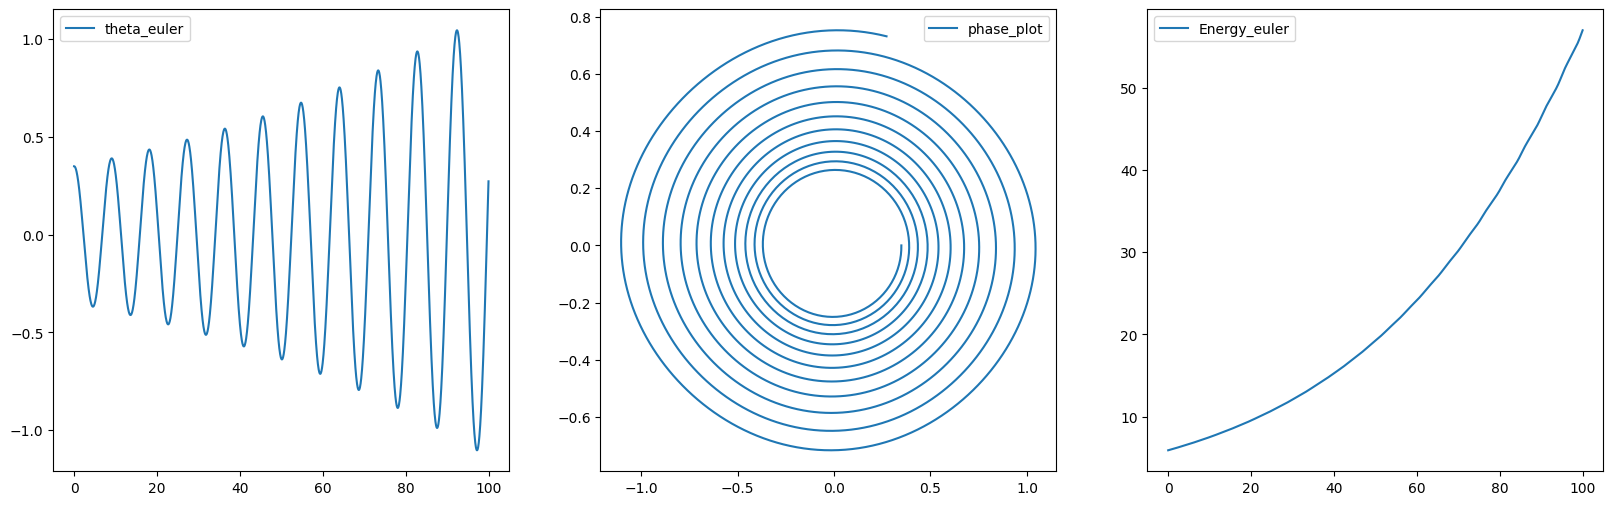

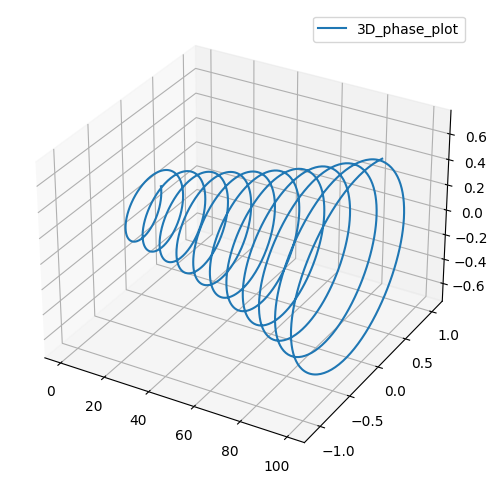

In [25]:
figure(figsize=(20, 6))
subplot(1, 3, 1)
plot(t, theta_euler, label = 'theta_euler')
legend()
subplot(1, 3, 2)
plot(theta_euler, dtheta_euler, label = 'phase_plot')
legend()
subplot(1, 3, 3)
plot(t[:-1], KE_euler, label = 'Energy_euler')
legend()

# make 3D plot
fig = figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, theta_euler, dtheta_euler, label = '3D_phase_plot')
legend()
show()

### Backward Euler 

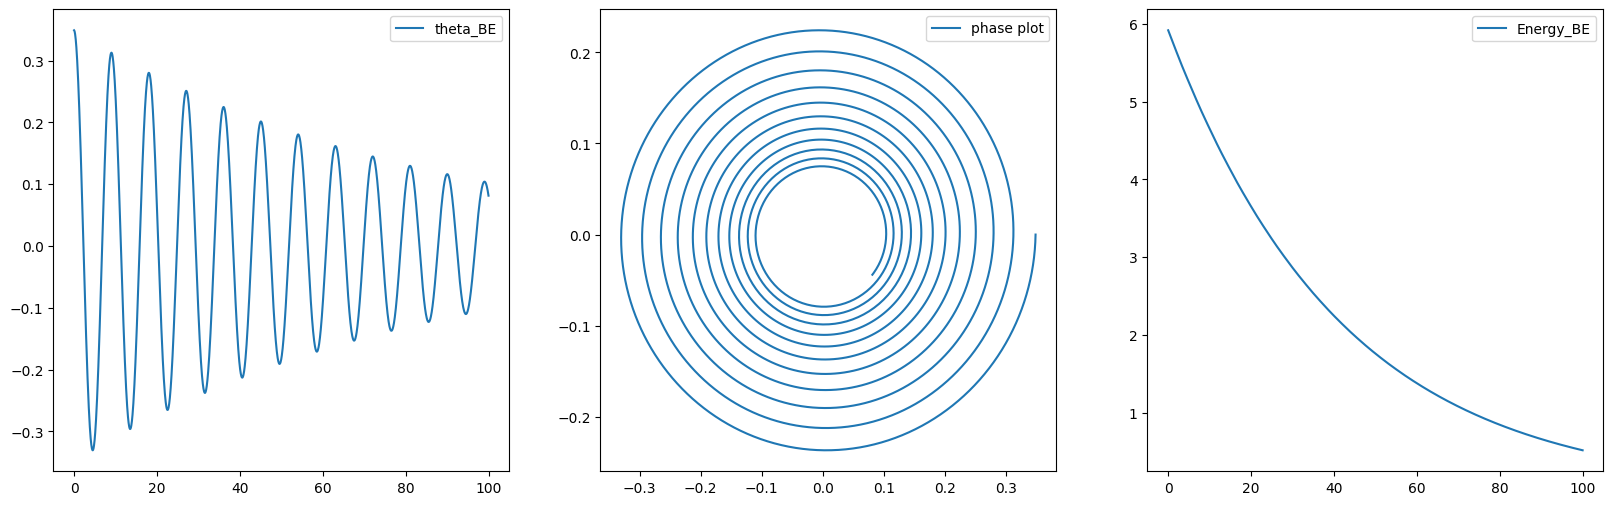

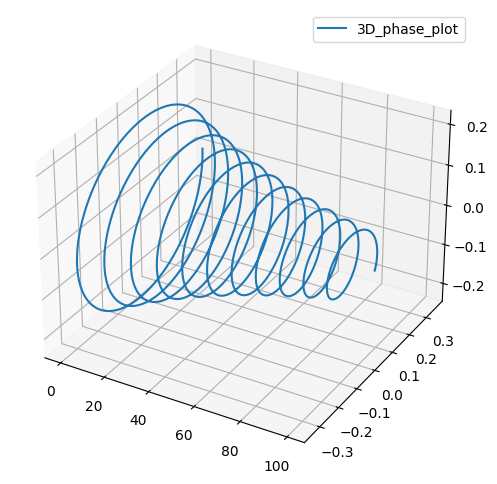

In [35]:
from scipy.optimize import fsolve

def BE_equation(x, x_prev, param, dt):
    m, L, g, d = param
    return [ x[0] - x_prev[0] - dt*x[1],
            x[1] - x_prev[1] - dt*(-g/L)*np.sin(x[0])]
    
X_BE = np.zeros((2, len(t)))
X_BE[:,0] = x0    
KE_BE = []

for k in range(N-1):
  x_prev = X_BE[:,k]
  X_BE[:,k+1] = fsolve(BE_equation, x0, args=(x_prev, param,h))
      
  KE = (1/2) *m* L**2 *X_BE[1, k]**2 + m*g*L*(1 - np.cos(X_BE[0, k]))
  KE_BE.append(KE)

theta_BE, dtheta_BE = X_BE    


figure(figsize=(20, 6))
subplot(1, 3, 1)
plot(t, theta_BE, label = 'theta_BE')
legend()
subplot(1, 3, 2)
plot(theta_BE, dtheta_BE, label = 'phase plot')
legend()
subplot(1, 3, 3)
plot(t[:-1], KE_BE, label = 'Energy_BE')
legend()


# make 3D plot
fig = figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, theta_BE, dtheta_BE, label = '3D_phase_plot')
legend()
show()


### Runge Kutta using Scipy

In [27]:
# # Runge Kutta Method using scipy
# from scipy.integrate import solve_ivp
# X_runge = []
# KE_runge = []
# x0 = np.array([np.pi/4,0])

# # pendulum dynamics
# def f_rung(t, x, parameters):
#   m, L, g, d = parameters
#   theta, dtheta = x
#   ddtheta = (-g/L) * np.sin(theta) #- d*dtheta 
#   return np.array([dtheta, ddtheta], dtype='double')

# pendulum_sol = solve_ivp(f_rung, (0, tf), x0, t_eval=t, args=(param,))
# sol = pendulum_sol.y

# KE_runge = (1/2) *m* L**2 * sol[1, :]**2 + m*g*L*(1 - np.cos(sol[0, :]))

# figure(figsize=(20, 6))
# subplot(1, 3, 1)
# plot(t, sol[0, :], label = 'theta_runge')
# legend()
# subplot(1, 3, 2)
# plot(sol[0, :], sol[1, :], label = 'phase_plot')
# legend()
# subplot(1, 3, 3)
# plot(t, KE_runge, label= 'Energy_runge')
# legend()

# # make 3D plot
# fig = figure(figsize=(20, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(t, sol[0, :], sol[1, :], label = '3D_phase_plot')
# legend()
# show()

### Runge Kutta from scratch

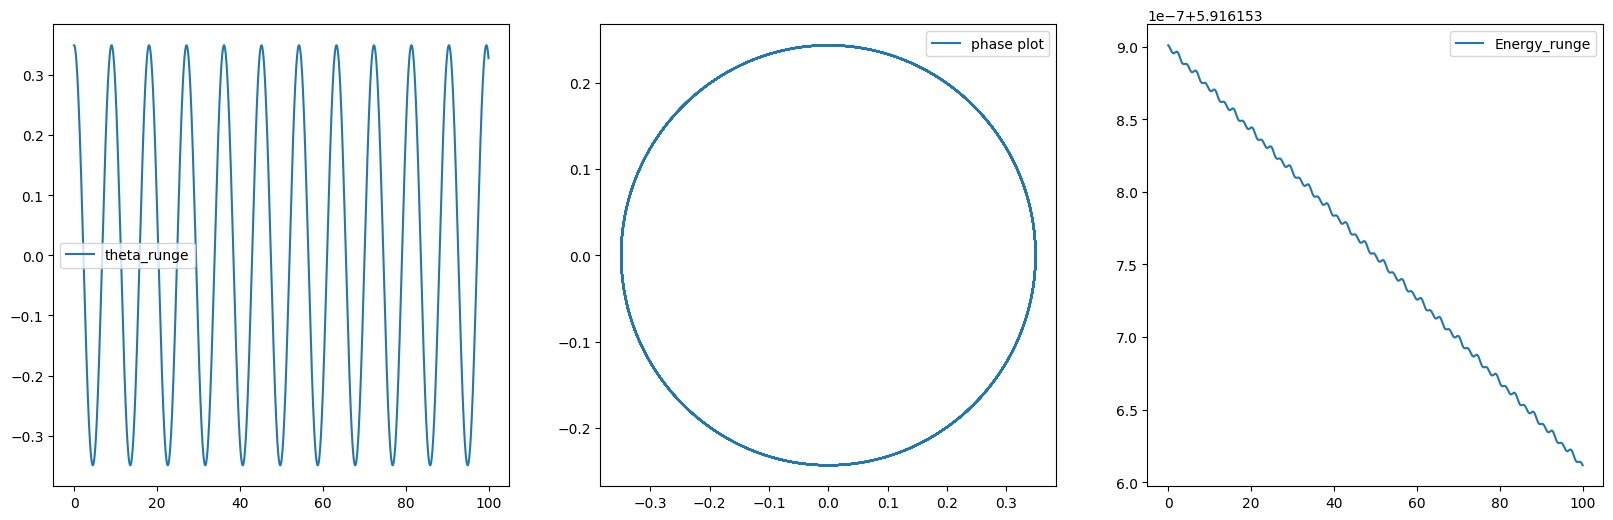

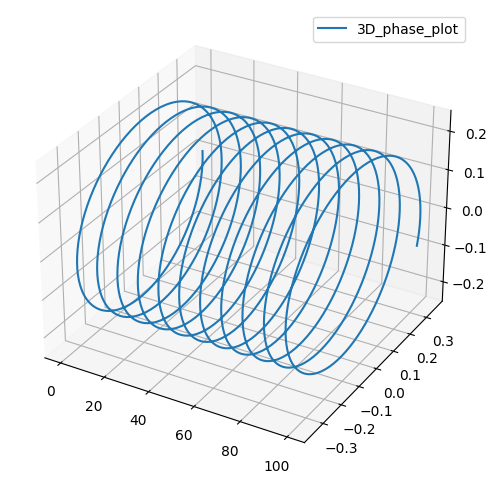

In [28]:
from time import perf_counter
# Runge Kutta from Scratch
E_runge = []
X_runge = np.zeros((2, len(t)))
X_runge[:, 0] = x0

t1 = perf_counter()
for k in range(N-1): 
    k1 = f(X_runge[:, k], param)
    k2 = f(X_runge[:, k] + ((h/2)*k1), param)
    k3 = f(X_runge[:, k] + ((h/2)*k2), param)
    k4 = f(X_runge[:, k] + (h*k3), param)
    
    X_runge[:, k+1] = X_runge[:, k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4) 

    E = (1/2) *m* L**2 *X_runge[1, k]**2 + m*g*L*(1 - np.cos(X_runge[0, k]))
    E_runge.append(E)

t_runge = perf_counter() - t1

theta_runge, dtheta_runge = X_runge

figure(figsize=(20, 6))
subplot(1, 3, 1)
plot(t, theta_runge, label = 'theta_runge')
legend()
subplot(1, 3, 2)
plot(theta_runge, dtheta_runge, label = 'phase plot')
legend()
subplot(1, 3, 3)
plot(t[:-1], E_runge, label = 'Energy_runge')
legend()


# make 3D plot
fig = figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t, theta_runge, dtheta_runge, label = '3D_phase_plot')
legend()
show()


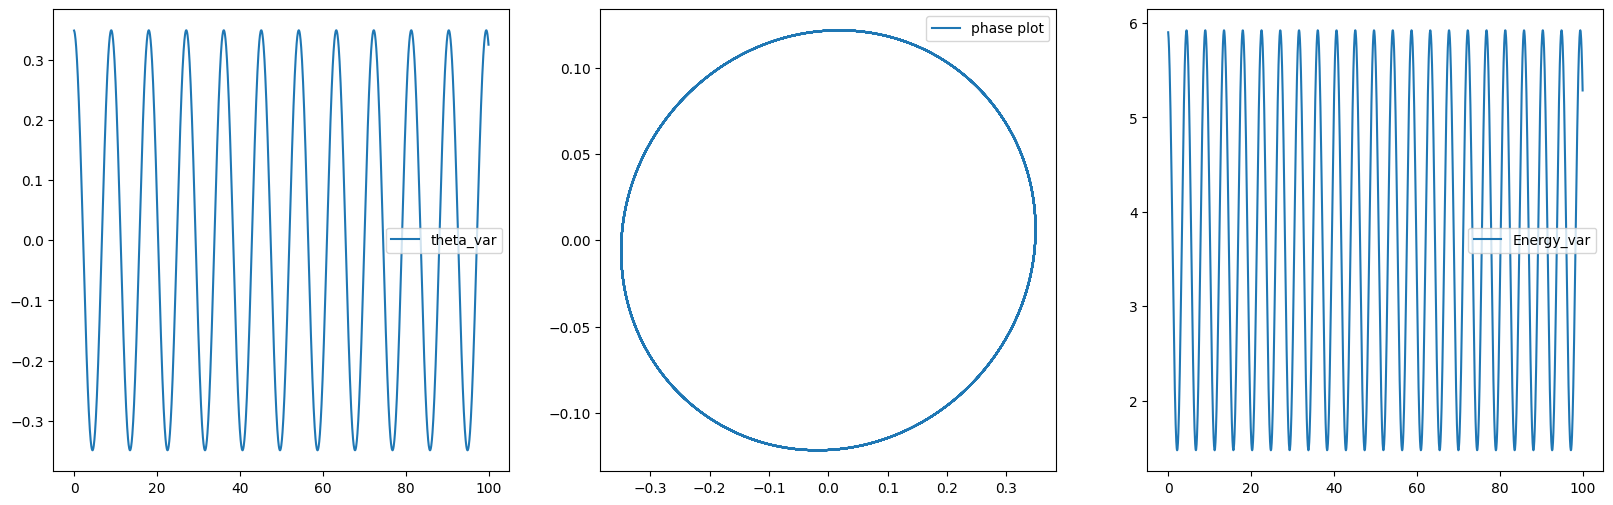

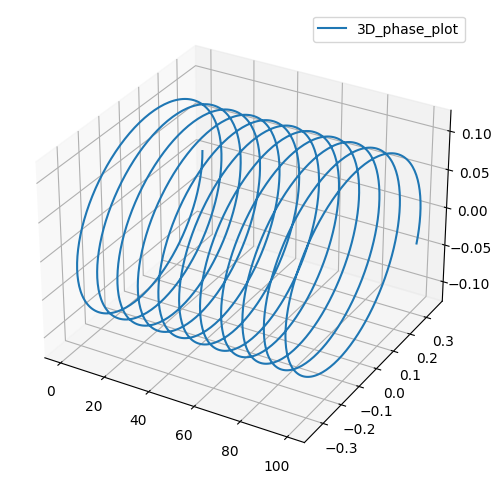

0.07531829993240535 0.0075656999833881855


In [29]:
# Variational Integrator Method
X_var = np.zeros(len(t))
X_var0 = np.pi/9
X_var1 = np.pi/9
theta_Var = []
dtheta_Var = []
KE_Var = []
t1 = perf_counter()
for k in range(N-1):

    X_var2 = -X_var0 + 2*X_var1 + h**2 * (-g/L) * np.sin(X_var1) 
    dx_var = (X_var1 - X_var0)/(h)

    KE = (1/2) *m* L**2 *dx_var**2 + m*g*L*(1 - np.cos(X_var2))

    X_var0 = X_var1
    X_var1 = X_var2

    theta_Var.append(X_var2)
    dtheta_Var.append(dx_var)
    KE_Var.append(KE)

t_var = perf_counter() - t1

theta_Var = np.array(theta_Var)
dtheta_Var = np.array(dtheta_Var)

figure(figsize=(20, 6))
subplot(1, 3, 1)
plot(t[:-1], theta_Var, label = 'theta_var')
legend()
subplot(1, 3, 2)
plot(theta_Var, dtheta_Var, label = 'phase plot')
legend()
subplot(1, 3, 3)
plot(t[:-1], KE_Var, label = 'Energy_var')
legend()


# make 3D plot
fig = figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[:-1], theta_Var, dtheta_Var, label = '3D_phase_plot')
legend()
show()

print(t_runge, t_var)

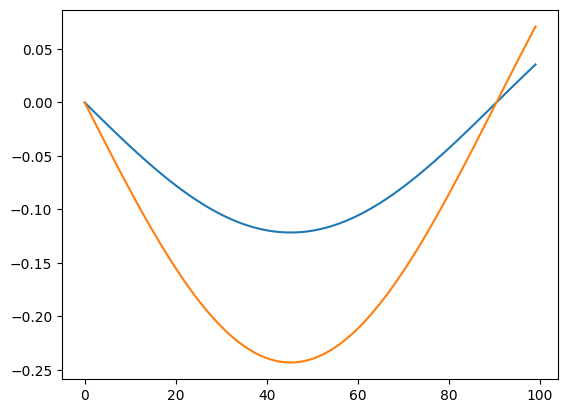

In [30]:

plot(dtheta_Var[:100])
plot(dtheta_runge[:100])
# legend()

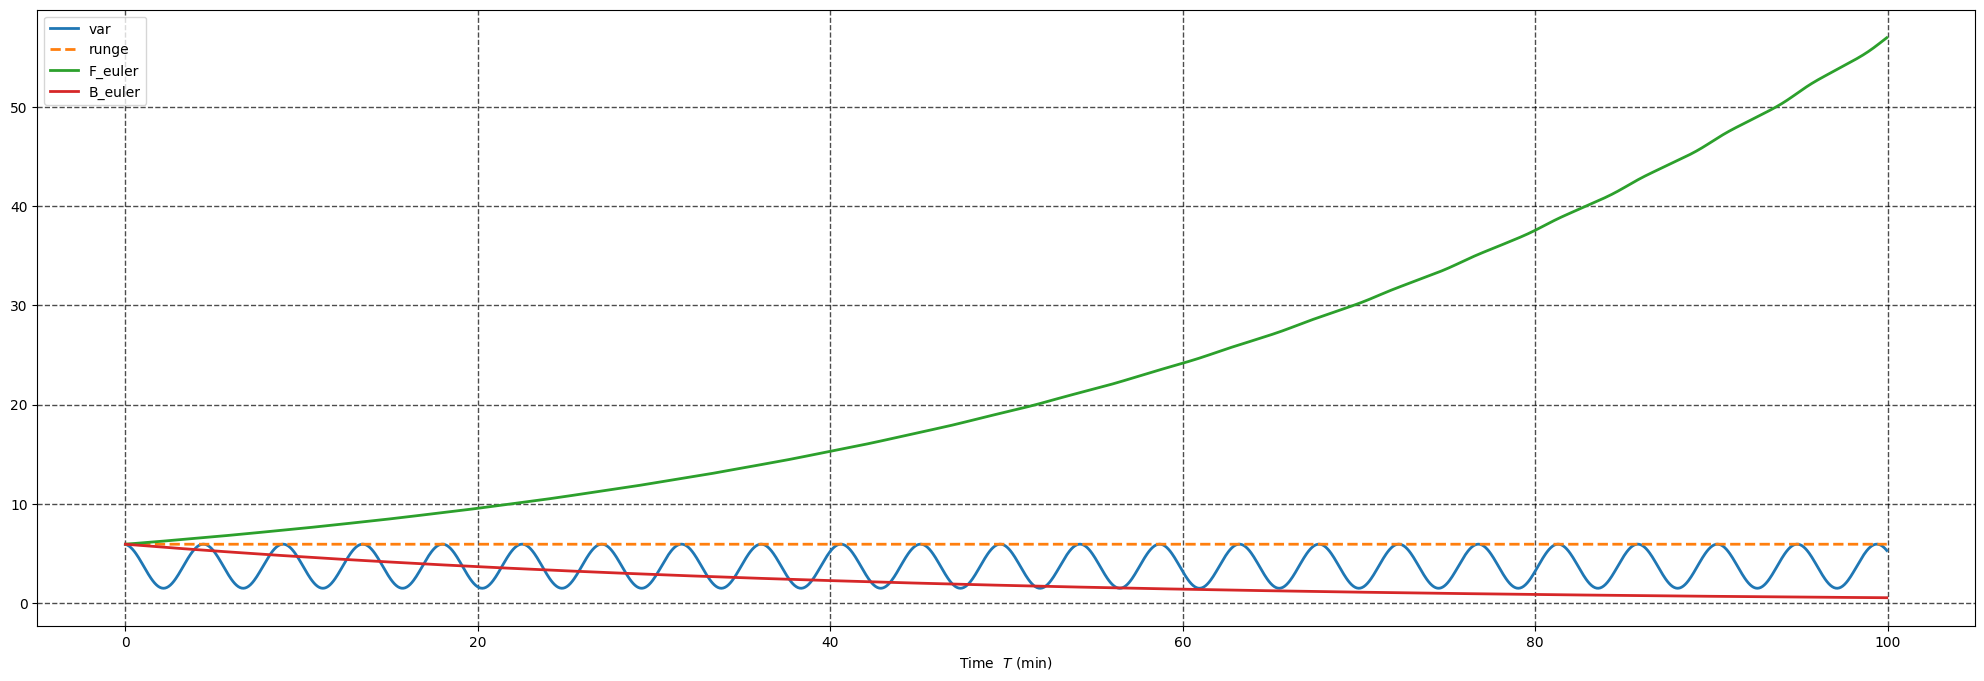

In [36]:
figure(figsize=(25, 8))
plot(t[:-1], KE_Var, linewidth=2.0, label='var')
plot(t[:-1], E_runge, linewidth=2.0, linestyle='--', label='runge')
plot(t[:-1], KE_euler, linewidth=2.0,  label='F_euler')
plot(t[:-1], KE_BE,linewidth=2.0,  label='B_euler' )
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Time  $T$ (min)')
legend()
show()

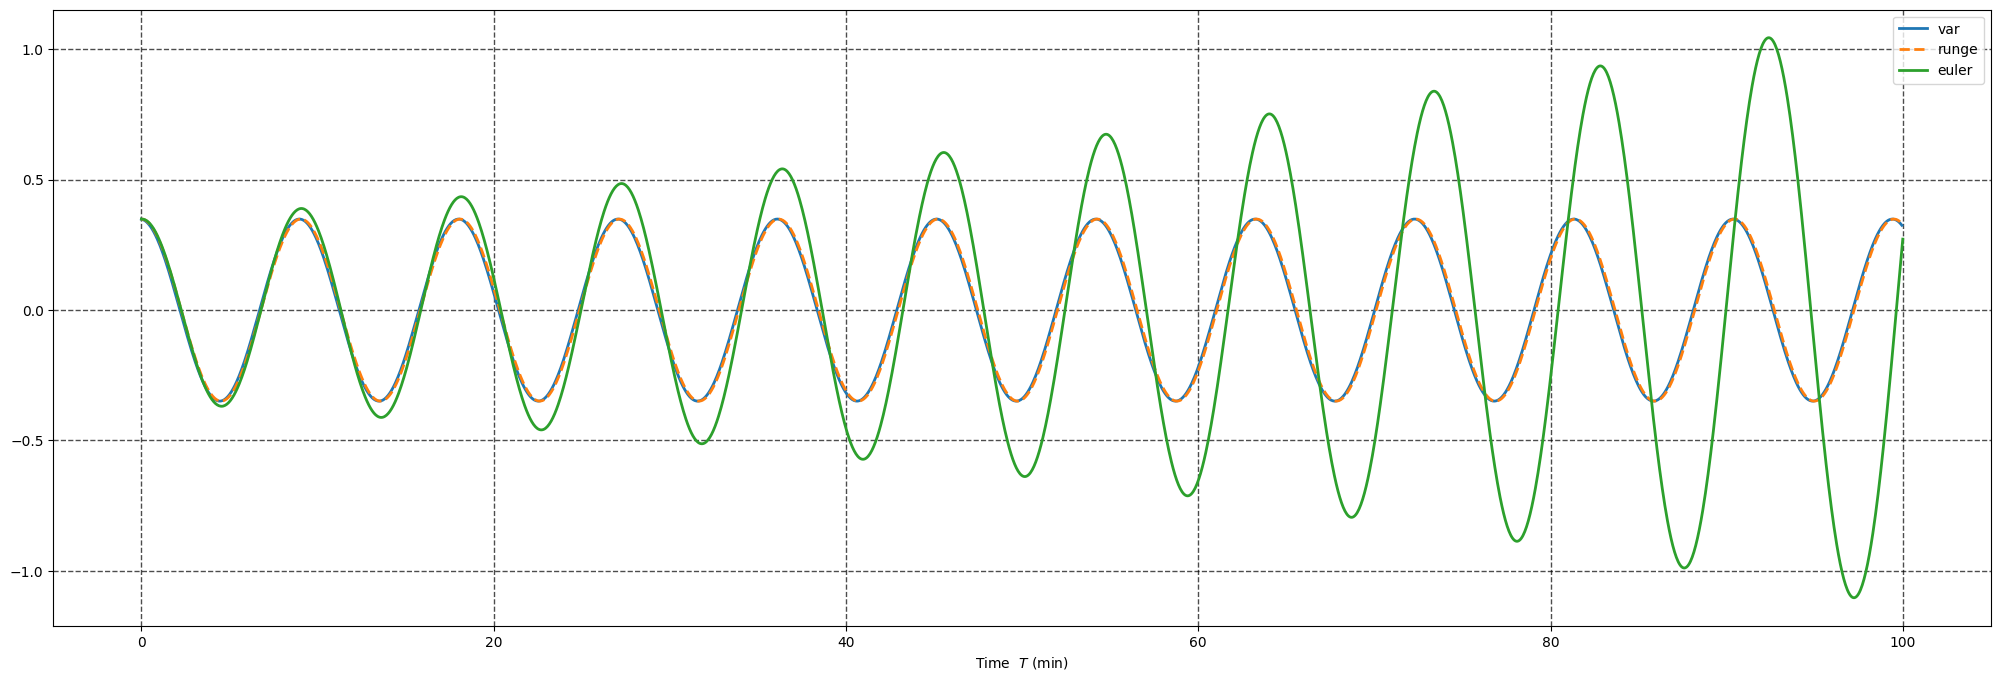

In [32]:
figure(figsize=(25, 8))
plot(t[:-1], theta_Var, linewidth=2.0, label='var')
plot(t, theta_runge, linewidth=2.0, linestyle='--', label='runge')
plot(t, theta_euler, linewidth=2.0,  label='euler')
grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
grid(True)
xlabel(r'Time  $T$ (min)')
legend()
show()